## Introduction:

Write a function called Sample, that takes a Cdf and an integer, n, and returns a list of n values chosen at random from the Cdf. 

Hint: use random.random. You will find a solution to this exercise in Cdf.py


Using the distribution of birth weights from the NSFG, generate a random sample with 1000 elements. Compute the CDF of the sample. Make a plot that shows the original CDF and the CDF of the random sample. For large values of n, the distributions should be the same.


## Solution steps:

- Choose a random probability in the range 0–1.
- Use Cdf.Value to find the value in the distribution that corresponds to the probability you chose.

In [73]:
import numpy as np
import survey
import first
import Cdf
import relay
import score_example
import itertools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [102]:
def Sample(cdf_, n):
    rand_vals = np.random.sample(n)
    vals = []
    
    for i in rand_vals:
        vals.append(Cdf.Cdf.Value(cdf_, i))

    return vals

### Data Extraction:

In [66]:
table = survey.Pregnancies()
table.ReadRecords()
outcome_ = np.zeros([len(table.records), 1])

for i in xrange(len(table.records)):
    outcome_[i] = table.records[i].outcome

In [67]:
partitions = first.PartitionRecords(table)
partitions  # divide the data to firsts, others .. 

(<survey.Pregnancies at 0x7f62bdf54590>,
 <survey.Pregnancies at 0x7f62bdf54d90>)

In [68]:
first_baby = partitions[0]
others = partitions[1]
len(first_baby), len(others)

(4413, 4735)

In [69]:
## tables 
t = first.MakeTables()
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

original_table, firsts_table, others_table

(<survey.Pregnancies at 0x7f62c7973650>,
 <survey.Pregnancies at 0x7f62bdaa8bd0>)

In [70]:
## I have to try Dr's way as a more effecient way .. 


first_baby_ = np.zeros([len(firsts_table.records), 1])

for i in xrange(len(firsts_table.records)):
    try:
        first_baby_[i] = firsts_table.records[i].birthwgt_oz
    except ValueError:
        first_baby_[i] = 0

In [71]:
others_baby_ = np.zeros([len(others_table.records), 1])

for i in xrange(len(others_table.records)):
    try:
        others_baby_[i] = others_table.records[i].birthwgt_oz
    except ValueError:
        others_baby_[i] = 0

In [76]:
all_babies = np.append(first_baby_, others_baby_)
all_babies ## weights of all babies .. 

array([ 13.,   2.,   9., ...,   0.,   8.,   8.])

In [80]:
merged = list(itertools.chain(*[all_babies]))
len(merged)

9148

In [81]:
cdf_population = Cdf.MakeCdfFromList(merged)

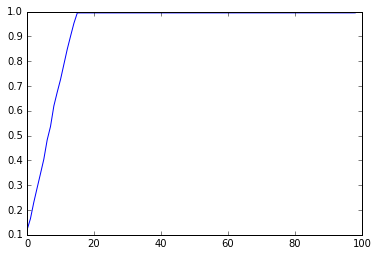

In [100]:
plt.plot(cdf_population.xs, cdf_population.ps)

In [103]:
n = 1000
sample_cdf  = Sample(cdf_population, n)

In [ ]:
I need to plot the sample cdf and compare it with the original data's cdf